In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import RandomNormal, Zeros

In [27]:
# 1. Load images from a local directory and split the dataset
def load_data(image_dir, img_height, img_width):
    images, labels = [], []
    class_names = sorted(os.listdir(image_dir))

    for label in class_names:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = load_img(image_path, target_size=(img_height, img_width))
            image = img_to_array(image)
            images.append(image)
            labels.append(class_names.index(label))  # Convert label to integer index

    images = np.array(images) / 255.0  # Normalize pixel values
    labels = np.array(labels)
    return train_test_split(images, labels, test_size=0.2, random_state=42), class_names

In [28]:
# 2. Visualize some samples from the dataset with labels
def visualize_samples(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {class_names[labels[i]]}")
        plt.axis('off')
    plt.show()

In [29]:
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [30]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation='relu',),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

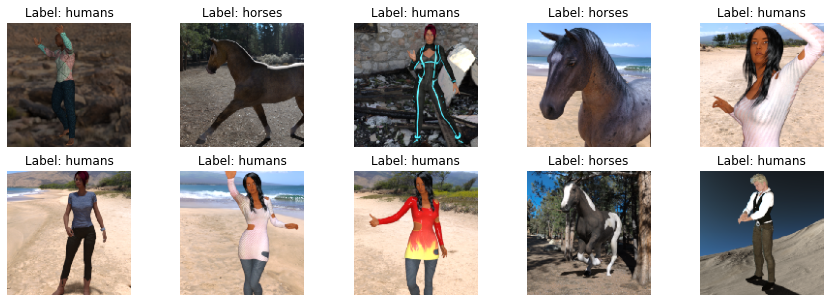

In [31]:
image_dir = '/Users/aditirajesh/Downloads/Mid-model Exam/horse-or-human/horse-or-human'  # Replace with the path to your image dataset
(img_train, img_test, label_train, label_test), class_names = load_data(image_dir, img_height=128, img_width=128)
visualize_samples(img_train, label_train, class_names)

# 5. Compile the model with hyperparameters
model = create_model(input_shape=(128, 128, 3), num_classes=len(class_names))
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model with data augmentation and early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [32]:
history = model.fit(
    data_augmentation.flow(img_train, label_train, batch_size=32),
    validation_data=(img_test, label_test),
    epochs=20,
)

Epoch 1/20
26/26 [==============================] - 12s 433ms/step - loss: 0.7779 - accuracy: 0.5250 - val_loss: 0.6661 - val_accuracy: 0.6165
Epoch 2/20
26/26 [==============================] - 10s 368ms/step - loss: 0.6185 - accuracy: 0.6797 - val_loss: 0.5671 - val_accuracy: 0.7670
Epoch 3/20
26/26 [==============================] - 9s 347ms/step - loss: 0.5390 - accuracy: 0.7345 - val_loss: 0.3792 - val_accuracy: 0.8883
Epoch 4/20
26/26 [==============================] - 9s 349ms/step - loss: 0.4372 - accuracy: 0.7820 - val_loss: 0.2411 - val_accuracy: 0.9272
Epoch 5/20
26/26 [==============================] - 11s 440ms/step - loss: 0.4363 - accuracy: 0.7954 - val_loss: 0.2006 - val_accuracy: 0.9515
Epoch 6/20
26/26 [==============================] - 13s 518ms/step - loss: 0.3468 - accuracy: 0.8514 - val_loss: 0.1826 - val_accuracy: 0.9320
Epoch 7/20
26/26 [==============================] - 12s 457ms/step - loss: 0.2887 - accuracy: 0.8733 - val_loss: 0.0982 - val_accuracy: 0.9903
E

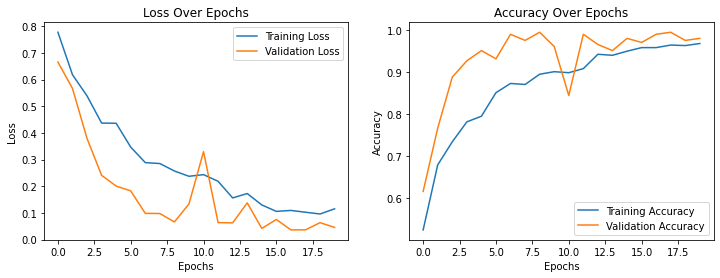

In [33]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(12, 4))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Over Epochs')

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    plt.show()

plot_loss_accuracy(history)

In [34]:
test_loss, test_accuracy = model.evaluate(img_test, label_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


7/7 [==============================] - 1s 95ms/step - loss: 0.0455 - accuracy: 0.9806
Test Loss: 0.0455436073243618
Test Accuracy: 0.9805825352668762


7/7 [==============================] - 1s 99ms/step


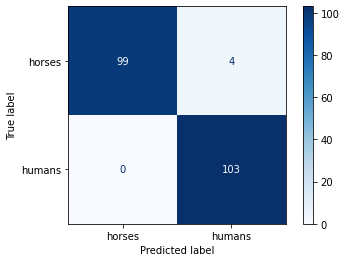

In [35]:
predictions = model.predict(img_test)
predicted_classes = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(label_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 64)       